
# A model using a single astrocyte with calcium dynamics

This script simulates an astrocyte with the model ``astrocyte_lr_1994``, which
implements the dynamics in the astrocyte based on [1]_, [2]_, and
[3]_. Recordings are made for two variables in the astrocyte,
inositol 1,4,5-trisphosphate (IP3) and cytosolic calcium. The astrocyte is driven
by a Poissonian spike train which induces the
generation of IP3 in the astrocyte, which in turn influences the calcium dynamics in
the astrocyte.

## See Also

:doc:`astrocyte_interaction`

## References

.. [1] Li, Y. X., & Rinzel, J. (1994). Equations for InsP3 receptor-mediated
       [Ca2+]i oscillations derived from a detailed kinetic model: a
       Hodgkin-Huxley like formalism. Journal of theoretical Biology, 166(4),
       461-473. DOI: https://doi.org/10.1006/jtbi.1994.1041

.. [2] De Young, G. W., & Keizer, J. (1992). A single-pool inositol
       1,4,5-trisphosphate-receptor-based model for agonist-stimulated
       oscillations in Ca2+ concentration. Proceedings of the National Academy
       of Sciences, 89(20), 9895-9899. DOI:
       https://doi.org/10.1073/pnas.89.20.9895

.. [3] Nadkarni, S., & Jung, P. (2003). Spontaneous oscillations of dressed
       neurons: a new mechanism for epilepsy?. Physical review letters, 91(26),
       268101. DOI: https://doi.org/10.1103/PhysRevLett.91.268101


Import all necessary modules for simulation and plotting.



In [1]:
import matplotlib.pyplot as plt
import nest


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Jul  3 2024 16:20:02

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



Set parameters for the simulation.



In [2]:
nest.ResetKernel()
# simulation time
sim_time = 60000
# astrocyte parameters
params_astro = {"IP3_0": 0.16}
# Poisson input for the astrocyte
poisson_rate = 1.0
poisson_weight = 1.0

Create astrocyte and devices and connect them.



In [3]:
astrocyte = nest.Create("astrocyte_lr_1994", params=params_astro)
ps_astro = nest.Create("poisson_generator", params={"rate": poisson_rate})
mm_astro = nest.Create("multimeter", params={"record_from": ["IP3", "Ca_astro"]})
nest.Connect(ps_astro, astrocyte, syn_spec={"weight": poisson_weight})
nest.Connect(mm_astro, astrocyte)

Run simulation and get results.



In [4]:
nest.Simulate(sim_time)
data = mm_astro.events


Jul 12 16:28:38 NodeManager::prepare_nodes [Info]: 
    Preparing 3 nodes for simulation.

Jul 12 16:28:38 SimulationManager::start_updating_ [Info]: 
    Number of local nodes: 3
    Simulation time (ms): 60000
    Number of OpenMP threads: 1
    Not using MPI

Jul 12 16:28:38 SimulationManager::run [Info]: 
    Simulation finished.


Create and show plots.



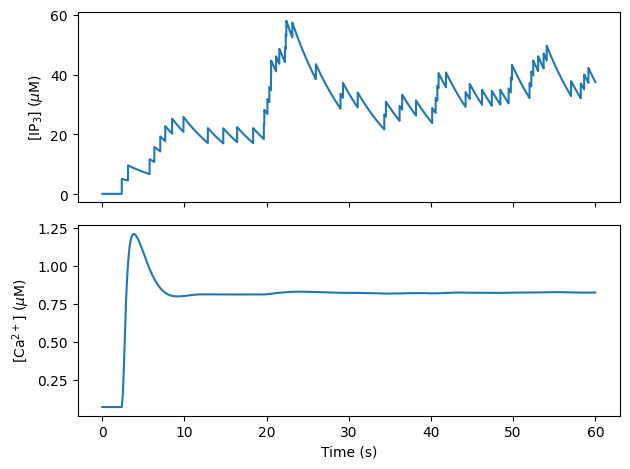

In [5]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(6.4, 4.8), dpi=100)
axes[0].plot(data["times"]/1000, data["IP3"])
axes[1].plot(data["times"]/1000, data["Ca_astro"])
axes[0].set_ylabel(r"[IP$_{3}$] ($\mu$M)")
axes[1].set_ylabel(r"[Ca$^{2+}$] ($\mu$M)")
axes[1].set_xlabel("Time (s)")
plt.tight_layout()
plt.show()
plt.close()